
# Project: Investigate No-show appointments Dataset 
### (Why patients miss their appointments?)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
###### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.  
● ‘Neighborhood’ indicates the
location of the hospital.  
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.  
● ‘No_show’ it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.  


#### Questions we are trying to answer :  

###### 1 - what is the overall appointment show-up vs. no show-up rate ? 
###### 2 - what are the most feature that matter the most of ('Age', 'being alcoholic','Having an SMS', 'Gender', 'bolsa familia'), to make the patient make it to his appiontment?


In [50]:
#import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
sns.set_style('whitegrid')


<a id='wrangling'></a>
## Data Wrangling

 Columns data types & Dataset shape,
 Missing values,
 Duplicates and
 Incorrect values
### General Properties

In [51]:
# Load  data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv') 
# print out a few lines of the data!
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [52]:
# This function will check what type of data each column is as well as how many rows by columns.
#checking the info of the data and look for instances of missing or possibly errant data.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


some columns headers contain typos and don't follow naming conventions.
some columns contain the wrong datatypes:The types of ScheduledDay and Appointmentday need converted to DateTime


In [53]:
#columns with missing values
df.isnull().sum()
#there is no missing values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [54]:
# check if there is a dplicates in the data 
df.duplicated().sum()

0

In [55]:
# Check if there is rows with the same only patient id and appointment id
df.duplicated(["PatientId","AppointmentID"]).sum()
#There is no duplicate values in the dataset


0

In [56]:
#Getting to know the rough value distribution of each column. rough value distribution of each column.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [57]:
# This will allow me to check for the parameters of the Age column so that 
# we can use it for a later exploration
df.Age.max()

115

In [58]:
df.Age.min()

-1

### Data Cleaning

1- Fixing typos in data columns,follow naming conventions and wrong datatypes

In [59]:
# lowercase labels for dataset
df.rename(columns=lambda x:x.lower(), inplace=True)
df


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [60]:
#Fixing typos in data columns and  follow naming conventions
df.rename(columns={'patientid':'patient_id', 'appointmentid':'appointment_id', 
                   'scheduledday':'scheduled_day', 'appointmentday':'appointment_day',
                   'neighbourhood':'neighborhood', 'scholarship':'bolsa_familia',
                   'hipertension':'hypertension', 'handcap':'handicap',
                   'no-show':'no_show'}, inplace=True)
df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,bolsa_familia,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [61]:
#check for wrong data and outliers.
print('Gender:',df.gender.unique())
print('Age:',sorted(df.age.unique()))
print('Neighborhood:',df.neighborhood.unique())
print('Bolsa Familia:',df.bolsa_familia.unique())
print('Hypertension:',df.hypertension.unique())
print('Diabetes:',df.diabetes.unique())
print('Alcoholism:',df.alcoholism.unique())
print('Handicap:',df.handicap.unique())
print('SMS Received:',df.sms_received.unique())
print('No-show:',df.no_show.unique())

Gender: ['F' 'M']
Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Neighborhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃ

In [62]:
# converting some columns that has date to a datetime datatype
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['scheduled_day'].head()
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['appointment_day'].head()

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
2   2016-04-29 00:00:00+00:00
3   2016-04-29 00:00:00+00:00
4   2016-04-29 00:00:00+00:00
Name: appointment_day, dtype: datetime64[ns, UTC]

2) fixing the ages less than zero

In [63]:
df.age.value_counts()


 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [64]:
#The age column seems to have some entries with negative age and some entries with age over 100 years. Entries with these ages will be treated as outliers and will be removed from the data.
df = df[(df.age >= 0) & (df.age <= 100)]
#There is just 1 value = -1 : We will drop it
#df.drop(df.query('age == -1').index,inplace=True)


In [65]:
# Check age
df['age'].describe()

count    110519.000000
mean         37.084519
std          23.103165
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         100.000000
Name: age, dtype: float64

In [66]:
#df['no_show'].replace("No", 0,inplace=True)
#df['no_show'].replace("Yes", 1,inplace=True)
df['no_show'].value_counts()


No     88203
Yes    22316
Name: no_show, dtype: int64

3) create a mask for people who came

In [67]:
# create a mask for people who came
showed = df['no_show'] =='No'
miss = df['no_show'] == 'Yes'
df['showed'] = showed
df['miss'] = miss
df.head(16)


<ipython-input-67-d52af4e49cb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['showed'] = showed
<ipython-input-67-d52af4e49cb8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['miss'] = miss


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,bolsa_familia,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,showed,miss
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,True,False
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,True,False
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,True,False
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,True,False
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,True,False
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,True,False
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,False,True
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,False,True
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,True,False
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,True,False


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 what is the overall appointment show-up vs. no show-up rate ? 

True     79.807997
False    20.192003
Name: showed, dtype: float64


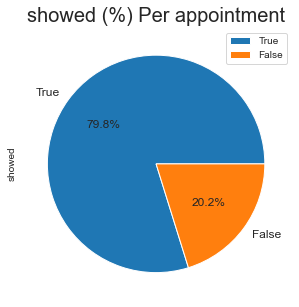

In [68]:
#making a pie chart to have the percentage of who showed up and who is not
all_Patients = df['showed'].value_counts()
print(all_Patients / sum(all_Patients) * 100)
all_Patients.plot(kind='pie',figsize=(5,5), autopct='%1.1f%%', fontsize = 12);
plt.title('showed (%) Per appointment', fontsize = 20);
plt.legend();


### Research Question 2  what are the most feature that matter the most of ('Age', 'being alcoholic','Having an SMS', 'Gender', 'bolsa familia'), to make the patient make it to his appiontment?

#### the average age of people who show up and people who didn't

In [37]:
df.age[showed].mean()

37.78729748421256

In [38]:
df.age[miss].mean()

34.30682021867718

###### making an bar chart to see the realtion between the (age,alcoholic people, SMS recievers, Gender, bolsa familia)  and the people who came to thier appointment

In [75]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # Fill in this list with  values you found

In [76]:
# Labels for the agelevel groups
bin_names = ["child","teen","young_adult","30s","40s", "50s", "retirement", "70s", "80s", "90s" ] # Name each age level category

In [83]:
# Creates age_levels column
df['age_levels']=pd.cut(df['age'],bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

<ipython-input-83-c247ac487eed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_levels']=pd.cut(df['age'],bin_edges, labels=bin_names)


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,bolsa_familia,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,showed,miss,age_levels
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,True,False,retirement
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,True,False,50s
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,True,False,retirement
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,True,False,child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,True,False,50s


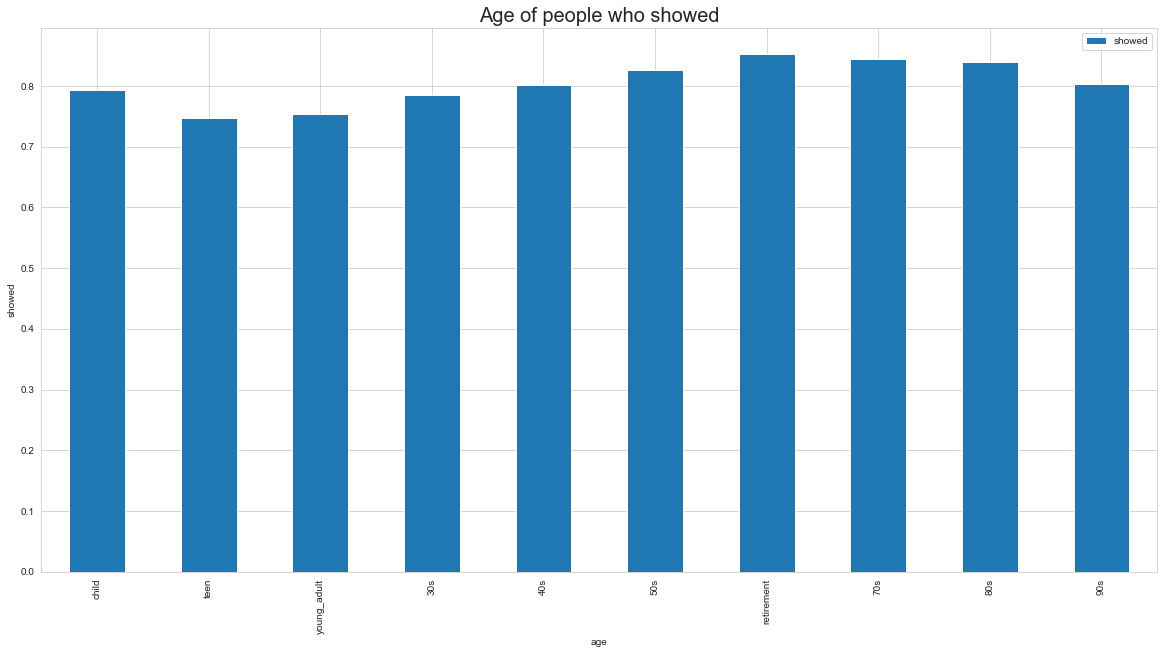

In [74]:
# visualize the average of people who came
df.groupby('age_levels').showed.mean().plot(kind='bar',figsize=(20,10));
plt.xlabel('age')
plt.ylabel('showed')
plt.title('Age of people who showed',fontsize = 20)
plt.legend();

sms_received
0    0.832991
1    0.724247
Name: showed, dtype: float64


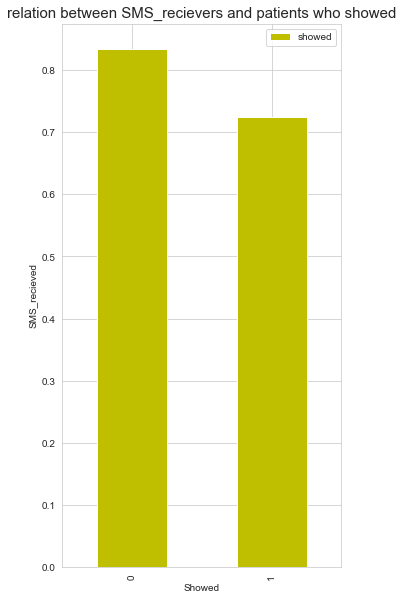

In [40]:
#the relation between sms recievers and people who showed up and who didn't
print(df.groupby('sms_received').showed.mean())
df.groupby('sms_received').showed.mean().plot(kind='bar',figsize=(5,10),color='y');
plt.xlabel('Showed')
plt.ylabel('SMS_recieved')
plt.title('relation between SMS_recievers and patients who showed',fontsize=15)
plt.legend();


alcoholism
0    0.798066
1    0.798512
Name: showed, dtype: float64


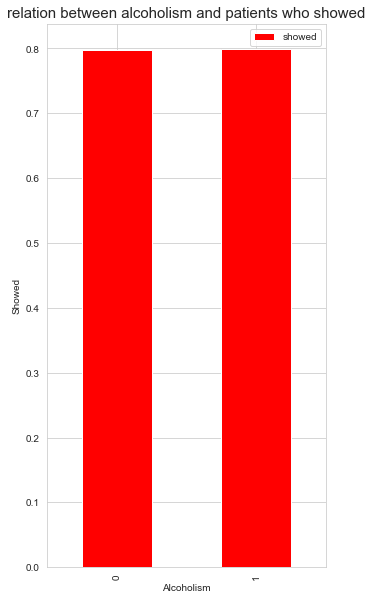

In [41]:
# relation between alcoholic people and people who showed up and who didn't
print(df.groupby('alcoholism').showed.mean())
df.groupby('alcoholism').showed.mean().plot(kind='bar',figsize=(5,10),color='r');
plt.xlabel('Alcoholism')
plt.ylabel('Showed')
plt.title('relation between alcoholism and patients who showed',fontsize = 15)
plt.legend();


gender  showed
F       True      57241
        False     14591
M       True      30962
        False      7725
Name: showed, dtype: int64


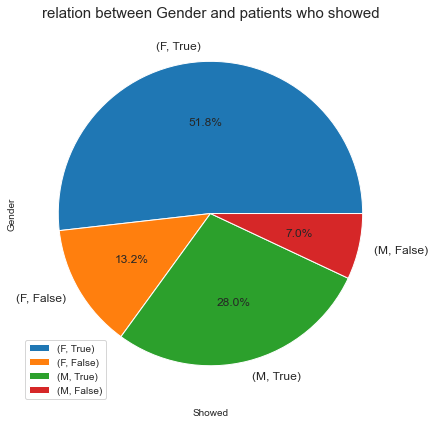

In [44]:
# and then see the relation between Gender and people who showed up and who didn't
print(df.groupby('gender').showed.value_counts())
df.groupby('gender').showed.value_counts().plot(kind='pie',figsize=(7,7), autopct='%1.1f%%', fontsize = 12);
plt.xlabel('Showed')
plt.ylabel('Gender')
plt.title('relation between Gender and patients who showed',fontsize=15)
plt.legend();

bolsa_familia
0    0.801943
1    0.762637
Name: showed, dtype: float64


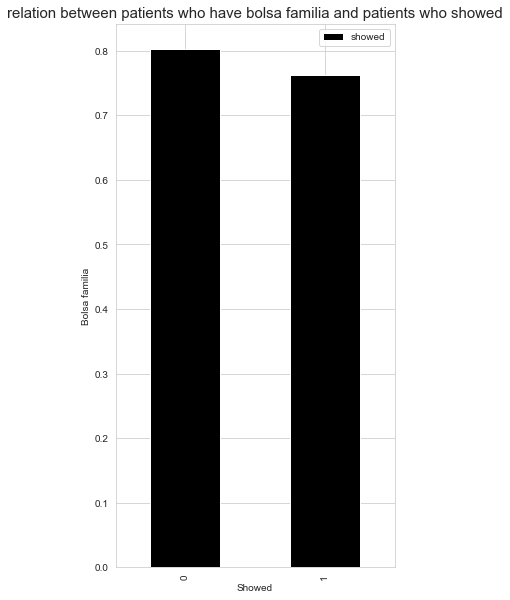

In [43]:
#the relation between people who has scholarship and people who showed up and who didn't

print(df.groupby('bolsa_familia').showed.mean())
df.groupby('bolsa_familia').showed.mean().plot(kind = 'bar',figsize=(5,10),color='k')
plt.xlabel('Showed')
plt.ylabel('Bolsa familia')
plt.title('relation between patients who have bolsa familia and patients who showed',fontsize=15)
plt.legend();

<a id='conclusions'></a>
## Conclusions

•The analysis indicates that there's a 20% chance a patient will not show up to their appointment. There are also some characteristics that increase or lower this chance.

• Age is the most factor that affect people who will attend or not:
  the Age is the most important factor that decided if a patient would come or not the average of age for people who will be     most likely to show up is 37 , and the average age for people who are not likely to show up is 34.

  kids and patients in their 60s, 70s,80s and 90s are more likely to show to their appointments


• Receiving an SMS did not increase the chance that the patient would show to their appointment.

• There is no correlation between alcoholism and missing the appointment.

• There is no correlation between gender and missing the appointment.

•The most of people who has Bolsa familia are most likely to miss thier appointments with a percentage of 76.2% of showing and patients who don't have a scholarship have the percentage 80.1%

### Limitations
• there we some illogical data such as patients with age 0 or less and more than 100.

• The Handcap columns weren't explained clearly on the dataset page.

• The dataset didn't explain why the patient comes to the doctor, which may give an additional explanation about why they miss their appointments  such as if the patient is employeed or not , or whether the patient have a series medical issue or not.

